In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data = pd.read_excel("Book1.xlsx")
data

,review_tag,processed_reviews
0,Good,yeapreordered july got august package wa nice ...
1,Good,got delivered yesterday used hour tell first m...
2,Good,amazing phone
3,Good,brilliant
4,Good,wa skeptically changing one plus word still pr...
...,...,...
9397,Bad,good
9398,Bad,poor
9399,Bad,bed
9400,Bad,average


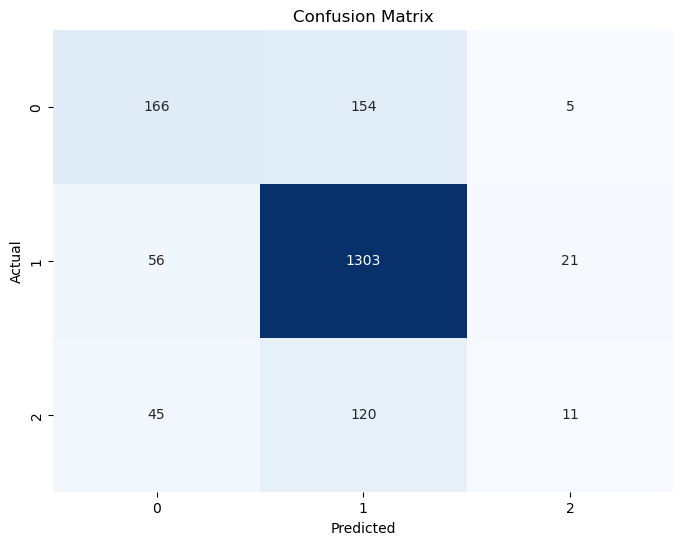


Accuracy: 0.786815523657629

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56       325
           1       0.83      0.94      0.88      1380
           2       0.30      0.06      0.10       176

    accuracy                           0.79      1881
   macro avg       0.58      0.51      0.52      1881
weighted avg       0.74      0.79      0.75      1881



In [2]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  
    stop_words="english"  
)

tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_reviews'])

tfidf_dense_matrix = tfidf_matrix.toarray()

tfidf_df = pd.DataFrame(tfidf_dense_matrix, columns=tfidf_vectorizer.get_feature_names_out())

final_data = pd.concat([data, tfidf_df], axis=1)

xgb_model = XGBClassifier()  

train_data, test_data = train_test_split(final_data, test_size=0.2, random_state=42)

target_column = "review_tag"
features_columns = tfidf_vectorizer.get_feature_names_out()

X_train = train_data[features_columns]
y_train = train_data[target_column]

X_test = test_data[features_columns]
y_test = test_data[target_column]

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model.fit(X_train, y_train_encoded)

predictions_encoded = xgb_model.predict(X_test)

accuracy_encoded = accuracy_score(y_test_encoded, predictions_encoded)

report = classification_report(y_test_encoded, predictions_encoded)

conf_matrix = confusion_matrix(y_test_encoded, predictions_encoded)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nAccuracy:", accuracy_encoded)

print("\nClassification Report:\n", report)